In [8]:
import pandas as pd
a= pd.read_csv('/content/DailyDelhiClimateTrain.csv')
print("Dataset Structure:")
print(a.info())
print(a)

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
            date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   

In [9]:
print("\nMissing Values:")
print(a.isnull().sum())



Missing Values:
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [10]:
print("\nmean values")
print(a.mean(numeric_only=True))
print("\nMedian Values:")
print(a.median(numeric_only=True))
print("\nStandard Deviations:")
print(a.std(numeric_only=True))


mean values
meantemp          25.495521
humidity          60.771702
wind_speed         6.802209
meanpressure    1011.104548
dtype: float64

Median Values:
meantemp          27.714286
humidity          62.625000
wind_speed         6.221667
meanpressure    1008.563492
dtype: float64

Standard Deviations:
meantemp          7.348103
humidity         16.769652
wind_speed        4.561602
meanpressure    180.231668
dtype: float64


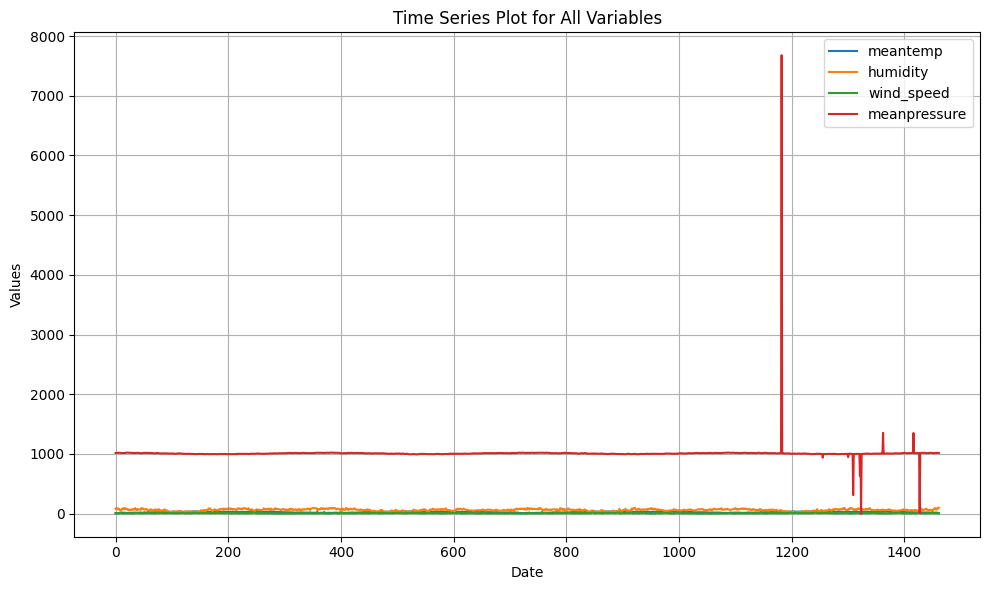

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
a.plot(ax=plt.gca())
plt.title('Time Series Plot for All Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


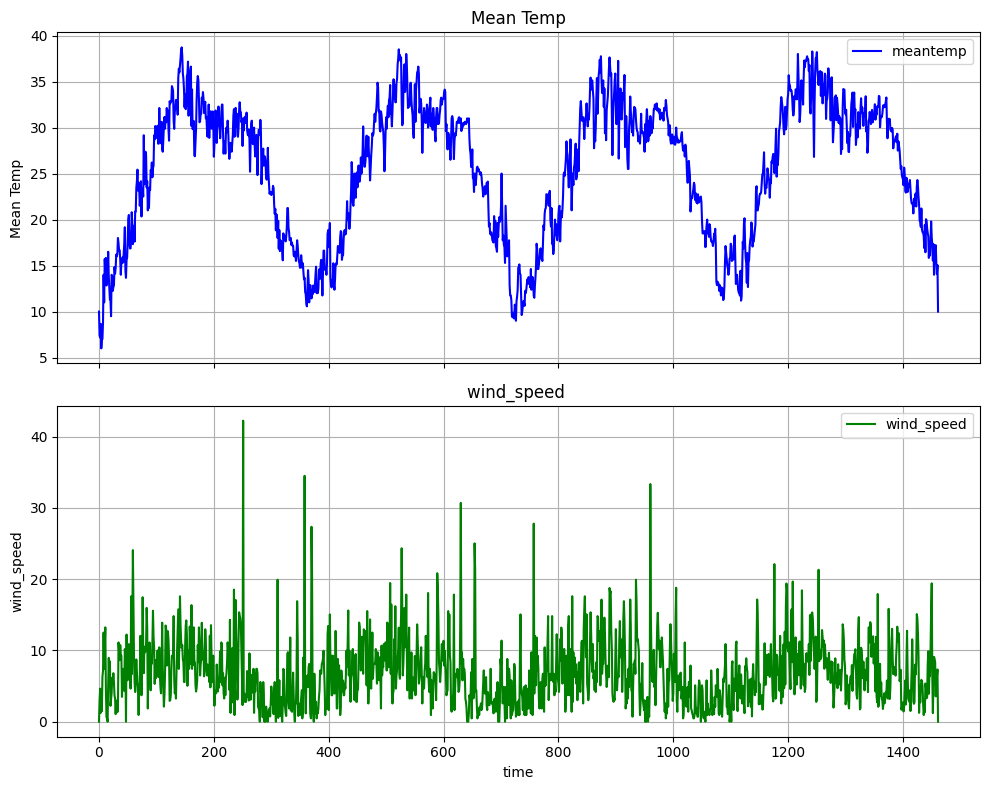

In [12]:
import matplotlib.pyplot as plt

# Check if the required columns exist
required_columns = ['meantemp', 'wind_speed']
if all(col in a.columns for col in required_columns):
    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

    # Plot 'meantemp'
    a['meantemp'].plot(ax=axes[0], legend=True, title='Mean Temp', grid=True, color='blue')
    axes[0].set_ylabel('Mean Temp')

    # Plot 'Wind_Speed'
    a['wind_speed'].plot(ax=axes[1], legend=True, title='wind_speed ', grid=True, color='green')
    axes[1].set_ylabel('wind_speed')
    axes[1].set_xlabel('time')

    plt.tight_layout()
    plt.show()
else:
    print("The required columns ('meantemp', 'Wind_Speed') are not present in the dataset.")


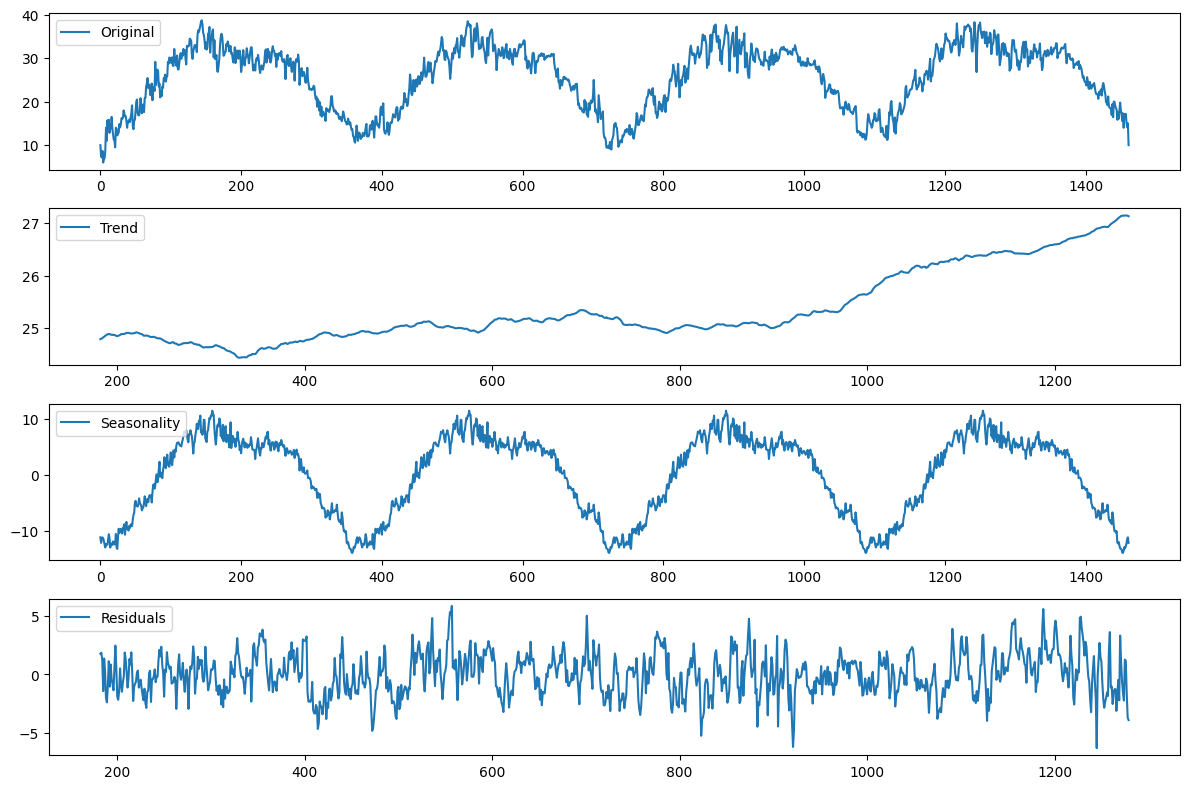

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition
decomposition = seasonal_decompose(a['meantemp'], model='additive', period=365)  # Period = 365 for daily data
# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(a['meantemp'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


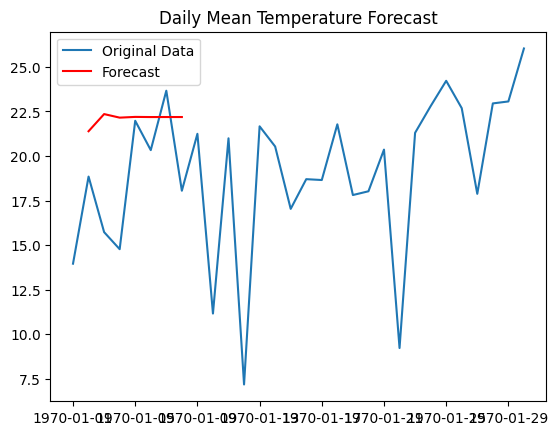

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
meantemp= np.random.normal(20, 5, 30)
temp_series = pd.Series(meantemp)
model = ARIMA(temp_series, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=7)

import matplotlib.pyplot as plt
plt.plot(temp_series, label='Original Data')
plt.plot(pd.date_range(start=temp_series.index[-1], periods=8, freq='D')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('Daily Mean Temperature Forecast')
plt.show()

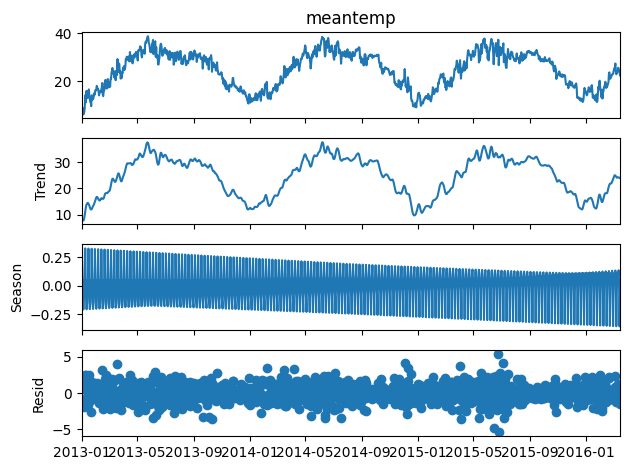

Trend Component:
date
2013-01-01     8.154877
2013-01-02     8.007526
2013-01-03     7.908465
2013-01-04     7.858921
2013-01-05     7.873218
                ...    
2016-03-10    24.242155
2016-03-11    24.194227
2016-03-12    24.137451
2016-03-13    24.060454
2016-03-14    23.949740
Name: trend, Length: 1169, dtype: float64
Seasonal Component:
date
2013-01-01    0.027003
2013-01-02    0.328679
2013-01-03    0.106166
2013-01-04   -0.147859
2013-01-05   -0.209276
                ...   
2016-03-10    0.089293
2016-03-11    0.134412
2016-03-12    0.017204
2016-03-13   -0.357892
2016-03-14   -0.086157
Name: season, Length: 1169, dtype: float64
Residual Component:
date
2013-01-01    1.818120
2013-01-02   -0.936205
2013-01-03   -0.847965
2013-01-04    0.955604
2013-01-05   -1.663942
                ...   
2016-03-10    1.231053
2016-03-11    0.738028
2016-03-12    0.407845
2016-03-13    0.547437
2016-03-14   -1.488582
Name: resid, Length: 1169, dtype: float64


In [20]:
from statsmodels.tsa.seasonal import STL
from sklearn.model_selection import train_test_split
a['date'] = pd.to_datetime(a['date'])
a.set_index('date', inplace=True)
train_data, test_data = train_test_split(a['meantemp'], test_size=0.2, shuffle=False)
seasonal_window = min(365, len(train_data) // 2)
if seasonal_window % 2 == 0:
    seasonal_window -= 1
stl = STL(train_data, seasonal=seasonal_window)
result = stl.fit()
result.plot()
plt.show()
trend = result.trend
seasonal = result.seasonal
residual = result.resid
print("Trend Component:")
print(trend)
print("Seasonal Component:")
print(seasonal)
print("Residual Component:")
print(residual)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import STL

target_column = 'meantemp'
train_data, test_data = train_test_split(a[target_column], test_size=0.2, shuffle=False)
stl = STL(train_data, seasonal=5)
result = stl.fit()

forecast = result.trend[-len(test_data):]

mae = mean_absolute_error(test_data, forecast)
rmse = sqrt(mean_squared_error(test_data, forecast))

print(f'Mean : {mae}')
print(f'Root Mean Squared: {rmse}')


Mean : 6.695789328857273
Root Mean Squared: 8.176736464458639
